In [37]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO


from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [38]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [112]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
   
    #nearcriticalone TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical/{}.txt".format(var)
    
    #nearcriticaltwo (more tuned) TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical0.1256/{}.txt".format(var)
    
    #subcriticalone A=0.01 TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.01/{}.txt".format(var)
    
    #subcriticaltwo A=0.001
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/{}.txt".format(var)
    
    #supercritical A=0.17 N=400
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/{}.txt".format(var)
    
    ##new##
    
    #A0.1256 called it nearcritical but its actually subcritical 
    dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/{}.txt".format(var)

    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/derpsi.txt


In [113]:
#m_nearcriticalone=m_scri
#x_nearcriticalone=converttobondi(time,beta_scri)

#m_nearcriticaltwo=m_scri
#x_nearcriticaltwo=converttobondi(time,beta_scri)

#m_subcriticalone=m_scri
#x_subcriticalone=converttobondi(time,beta_scri)

#m_subcriticaltwo=m_scri
#x_subcriticaltwo=converttobondi(time,beta_scri)

#m_supercritical=m_scri
#x_supercritical=converttobondi(time,beta_scri)

##

m_new=m_scri
x_new=converttobondi(time,beta_scri)


# Convert to Bondi

In [114]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

"""def funcc(x):
    return x

def trap_integrator(func,f0,x0,x1):
    dx=(x1-x0)
    integral=dx/2*(func(x0)+func(x1))
    
    return f0+integral

trap_integrator(funcc,0,0,1)"""

#convert central time to bondi time
def converttobondi(time, betascri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(betascri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

####

# Styling plots

In [115]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

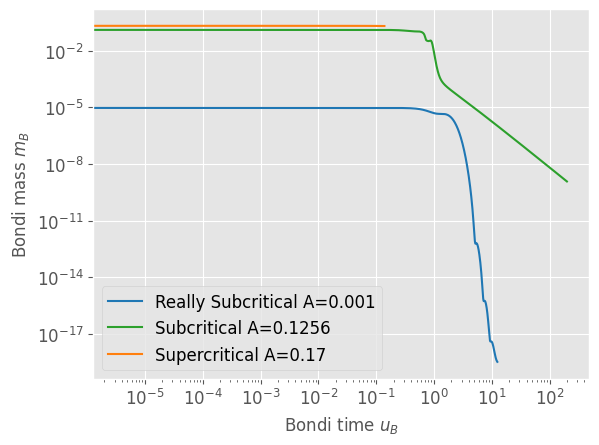

In [163]:

with plt.style.context('ggplot'):

    #plt.plot(x_subcriticalone, m_subcriticalone,label="subcritical")    
    
    plt.plot(x_subcriticaltwo, m_subcriticaltwo,label="Really Subcritical A=0.001",color='#1f77b4')
    
    plt.plot(x_new, m_new,label="Subcritical A=0.1256",color='#2ca02c')
    
    plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();

    #plt.xlim([2,200])
    #plt.ylim([1e-9,8e-5])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [152]:
(1e-9-8e-5)/(200-2)

-4.0403535353535356e-07

Figure 7 attempt

In [187]:
adapt_time=[]
tau_star=0.15
for x in x_supercritical:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))
        
adapt_time;

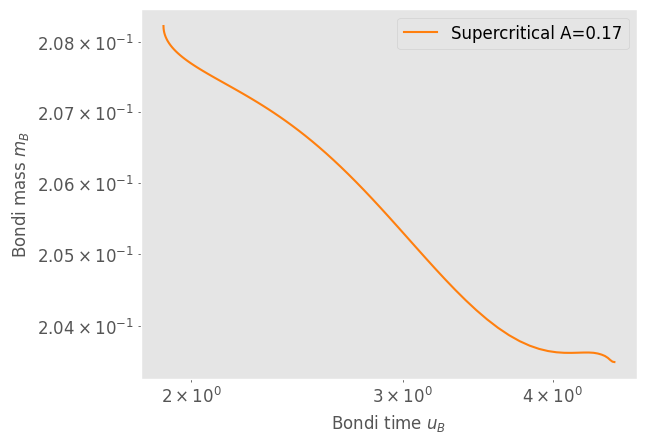

In [189]:

with plt.style.context('ggplot'):
    
    #plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')
    plt.plot(adapt_time[0:len(m_supercritical)], m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    plt.xscale("log")
    plt.yscale("log")
    
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();
    #plt.ylim([1e-6,1])
    #plt.xlim([0,5])
    #plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

Value of Bondi mass at scri+ over time

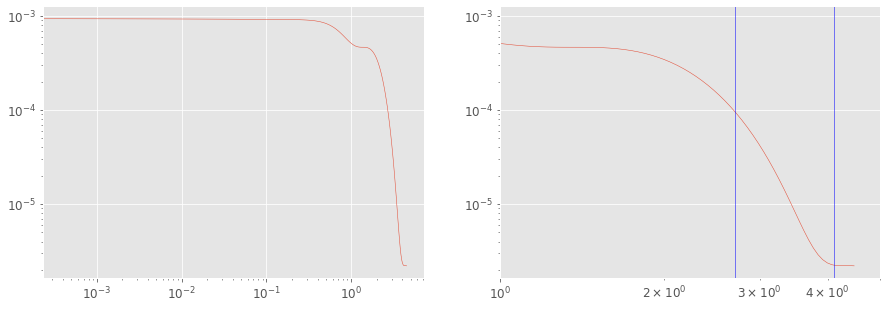

In [292]:
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))

    ax1.plot(x_subcriticalone,m_subcriticalone,linewidth=0.5)
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(aa,m_subcriticalone,linewidth=0.5)
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
    ax2.set_xlim([1,5])
    ax2.axvline(x = 2.7, color = 'b', linewidth=0.5)
    ax2.axvline(x = 4.1, color = 'b', linewidth=0.5)
 
    
    
    plt.show()

In [29]:
(10^(-16)-10^(-8))/(4.1-2.7)

14.285714285714292